In [1]:
include("models/GMM.jl")
import .gmmodel

using Distributions
using Plots
using LinearAlgebra
using DataFrames
using StatsPlots


function sample_mvgmm(model::gmmodel.MvGMM, n_samples::Integer = 100)
    sigma = model.Σ
    mu = model.μ

    s = sigma[1,:]
    m = mu[1,:]
    d = MvNormal(m, s)
    x = rand(d, n_samples)
    component = ones(n_samples)

    for i in 2:size(sigma)[1]
        s = sigma[i,:]
        m = mu[i,:]
        d = MvNormal(m, s)
        x = cat(x, rand(d, n_samples), dims=2)
        component = vcat(component, ones(n_samples) * i)
    end
    df = DataFrame(transpose(x), :auto)
    df[!, "component"] = component
    df
end



sample_mvgmm (generic function with 2 methods)

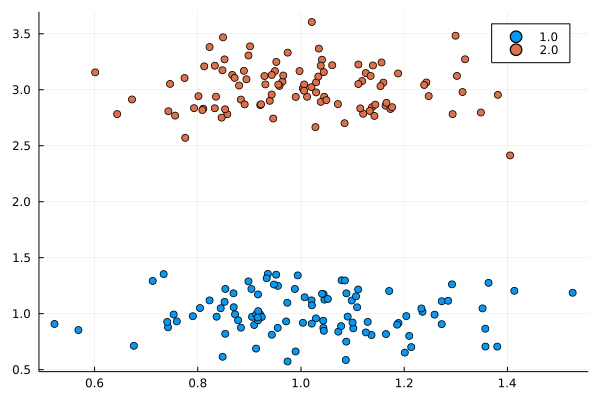

In [2]:
mvgmm = gmmodel.MvGMM(2, 2, [[1.0, 1.0] [1.0, 3.0]], [[0.2, 0.2] [0.2, 0.2]])

df = sample_mvgmm(mvgmm)
@df df scatter(:x1, :x2, group= :component)

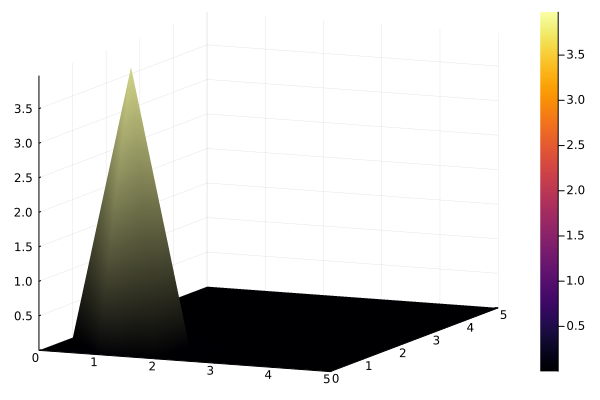

In [3]:
s = mvgmm.Σ[1,:]
m = mvgmm.μ[1,:]
d = MvNormal(m, s)
Z = [pdf(d,[i,j]) for i in 0:5, j in 0:5]
plot(0:5,0:5,Z,st=:surface)


12×12 Matrix{Float64}:
 5.52584e-11   1.48279e-5    5.52584e-11   …  1.46457e-271  0.0  0.0  0.0
 1.48279e-5    3.97887       1.48279e-5       3.92998e-266  0.0  0.0  0.0
 5.52584e-11   1.48279e-5    5.52584e-11      1.46457e-271  0.0  0.0  0.0
 2.85993e-27   7.67425e-22   2.85993e-27      7.57994e-288  0.0  0.0  0.0
 2.05565e-54   5.51608e-49   2.05565e-54      5.4483e-315   0.0  0.0  0.0
 2.05203e-92   5.50635e-87   2.05203e-92   …  0.0           0.0  0.0  0.0
 2.84481e-141  7.63369e-136  2.84481e-141     0.0           0.0  0.0  0.0
 5.47725e-201  1.46975e-195  5.47725e-201     0.0           0.0  0.0  0.0
 1.46457e-271  3.92998e-266  1.46457e-271     0.0           0.0  0.0  0.0
 0.0           0.0           0.0              0.0           0.0  0.0  0.0
 0.0           0.0           0.0           …  0.0           0.0  0.0  0.0
 0.0           0.0           0.0              0.0           0.0  0.0  0.0

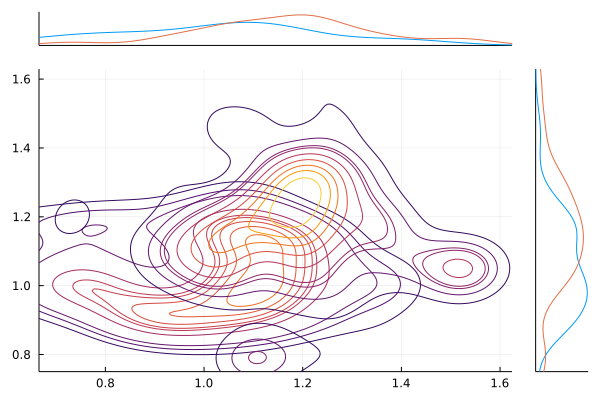

In [20]:
x = rand(MvNormal([1,1], [0.2,0.2]), 50)
marginalkde(x[1,:], x[2,:])
x = rand(MvNormal([1.2,1.2], [0.2,0.2]), 50)
marginalkde!(x[1,:], x[2,:])

In [15]:
x

2×50 Matrix{Float64}:
 0.782042  0.991779  0.922149  0.923181  …  1.33674  1.15663   1.08653
 1.03372   1.20731   1.06368   1.27921      1.15646  0.998748  1.59371

In [17]:
x = rand(MvNormal([1,1], [0.2,0.2]), 50)


2×50 Matrix{Float64}:
 1.13652  0.92541   1.11095  0.865096  …  0.722635  0.99155  0.664287
 1.01407  0.908772  1.3912   0.892726     1.17607   1.08792  1.15501